In [17]:
 AUTOMOBILE_MARKET_SEGMENTATION

 AUTOMOBILE_MARKET_SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_excel(r'/content/cars dataset.xlsx')

In [3]:

# Step 1: Data Cleaning and Preprocessing
# Clean numeric columns
df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

In [4]:
# Check for missing values
print("Missing Values Before Imputation:")
print(df.isnull().sum())

Missing Values Before Imputation:
name         0
year         0
fuel         0
mileage      0
engine       0
max_power    0
seats        0
dtype: int64


In [5]:
# Fill missing values (if any) with median
numeric_df = df.select_dtypes(include=np.number)
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())


# Encode categorical features (if needed)
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)

# Feature selection for analysis
features = ['mileage', 'engine', 'max_power', 'seats']
X = df[features]


In [6]:
# Step 2: Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

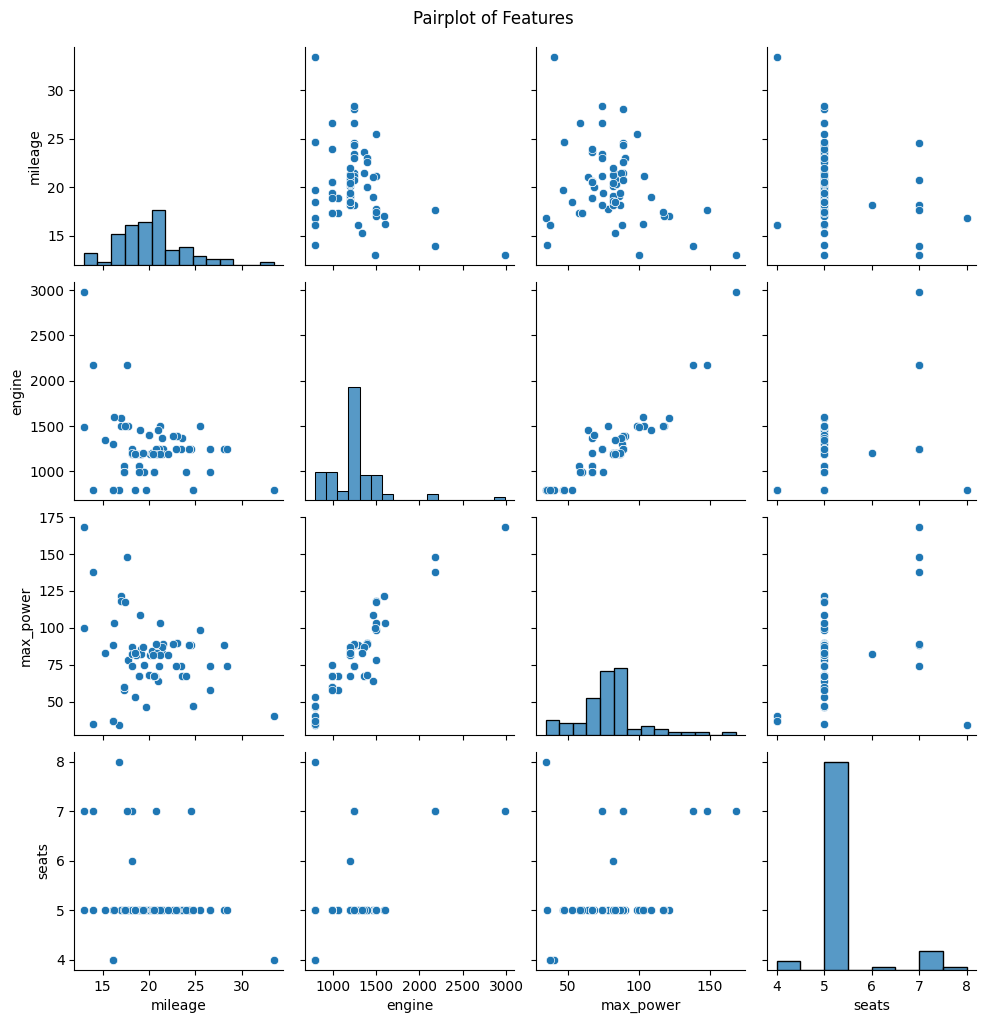

In [7]:
# Step 3: Data Visualization
# Pairplot of the features
sns.pairplot(df[features])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


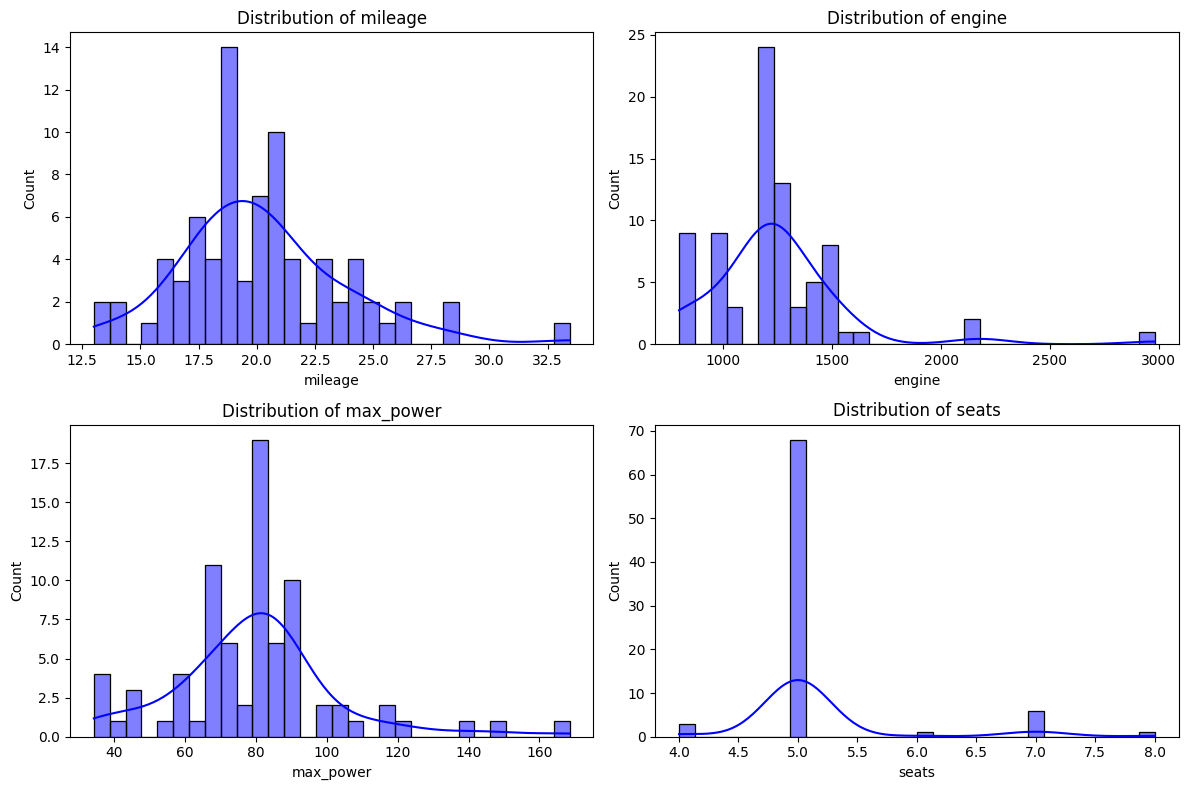

In [8]:
# Distribution of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


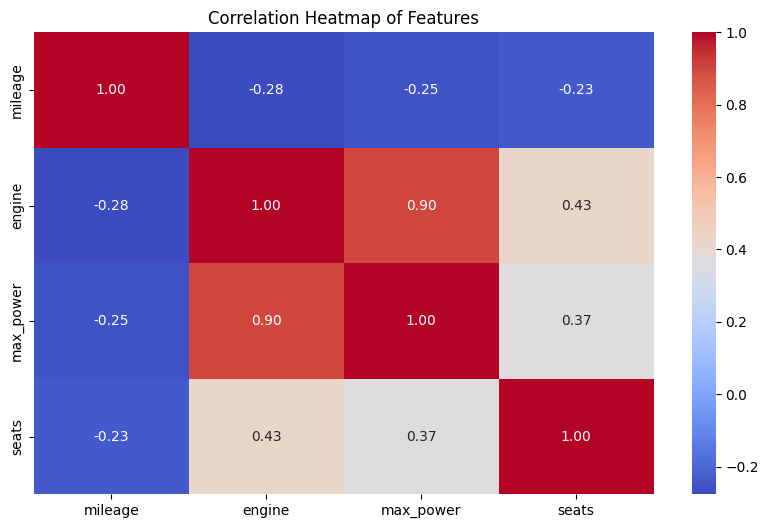

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
pip install scikit-learn

In [12]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=bf84660bf0add45b168cc00e5351e5a678e986d500eca2376ff0a38062b22505
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [14]:
 data=pd.read_excel(r"/content/cars dataset.xlsx")
 data1=pd.read_excel(r"/content/cars dataset.xlsx")
 data.columns.values.tolist()

['name', 'year', 'fuel', 'mileage', 'engine', 'max_power', 'seats']

In [15]:
data.shape

(79, 7)

In [16]:
 data.head()

,name,year,fuel,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,Diesel,23.4 kmpl,1248 CC,74 bhp,5
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,21.14 kmpl,1498 CC,103.52 bhp,5
2,Honda City 2017-2020 EXi,2006,Petrol,17.7 kmpl,1497 CC,78 bhp,5
3,Hyundai i20 Sportz Diesel,2010,Diesel,23.0 kmpl,1396 CC,90 bhp,5
4,Maruti Swift VXI BSIII,2007,Petrol,16.1 kmpl,1298 CC,88.2 bhp,5


In [17]:
df = pd.DataFrame(data)

In [18]:
df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

In [19]:
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)

In [20]:
X = df[['year', 'engine', 'max_power', 'seats'] + [col for col in df.columns if 'fuel_' in col]]
y = df['mileage']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.4135396875000013
Root Mean Squared Error: 1.804579468362627


ML MODEL

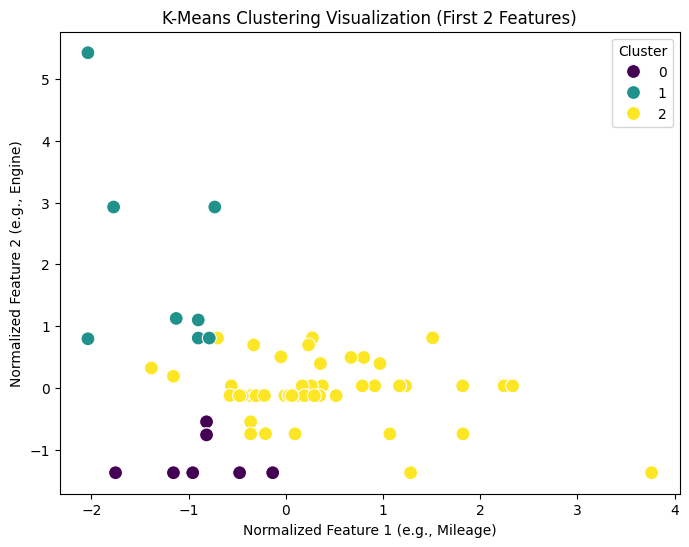

Cluster Centers (Original Scale):
     mileage       engine   max_power     seats
0  17.011111   869.222222   46.666667  5.111111
1  15.641250  1877.125000  126.783750  5.750000
2  21.219839  1209.290323   78.539516  5.096774


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and preprocessing
df = pd.read_excel(r'/content/cars dataset.xlsx')

# Cleaning and converting columns to numeric
df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

# Selecting features for clustering
features = ['mileage', 'engine', 'max_power', 'seats']
X = df[features]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Visualizing the Clusters (using first 2 features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-Means Clustering Visualization (First 2 Features)')
plt.xlabel('Normalized Feature 1 (e.g., Mileage)')
plt.ylabel('Normalized Feature 2 (e.g., Engine)')
plt.legend(title="Cluster")
plt.show()

# Analyzing cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(pd.DataFrame(centers, columns=features))

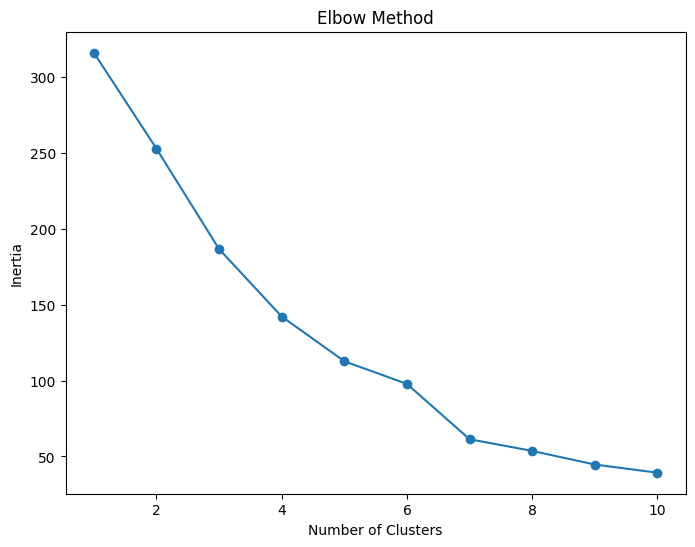

In [26]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
